# Investigate SBM block sizes
We are attempting to learn SBM representations with a min-block size constraint.

Optimally, we would like all blocks to have minimum size (gives smallest expected reconstruction error).

The current implementation (Metis asigner) creates initial blocks, and their sizes never change. However, these initial blocks are not all minimum block size.

Here we plot the actual block-size distributions and compare with pre-specified min-block-size.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_min_block_size(string):
    # find index of substring 'min_block_size'
    index = string.find('min_block_size')

    tail_string = string[index + len('min_block_size_'):]
    block_size = tail_string.split("_")[0]

    return int(block_size)

In [4]:
import yaml
from sbm.utils.pipeline_utils import sbmfit_folderpath
from sbm.io import SBMWriter

fit_config = yaml.safe_load(Path("/Users/lmmi/anon_sbm/configs/sbm_fit_block_size_experiments.yml").read_text())
data_config = fit_config["datasets"] # type: ignore

min_block_sizes = []
block_sizes = []
for sbm_config in fit_config["sbm"]:
    for ds in data_config:

        # load fitted model
        fit_folder_path = sbmfit_folderpath(
            base_dir=Path("/Users/lmmi/anon_sbm/data/sbm_fits"),
            sbm_config=sbm_config,# type: ignore
            data_spec=ds,
        )
        print(f"Loading fit from {fit_folder_path}")
        min_block_size = get_min_block_size(str(fit_folder_path))
        sbm_fit = SBMWriter.load(fit_folder_path, silence=True)

        min_block_sizes.append([min_block_size] * len(sbm_fit.block_sizes))
        block_sizes.append(sbm_fit.block_sizes)


Loading fit from /Users/lmmi/anon_sbm/data/sbm_fits/sbm_fit_congress_twitter_cooling_rate_0_999_force_undirected_True_init_method_ProneKMeans_max_n_iter_10000_min_block_size_3_patience_1000_temperature_1_0


FileNotFoundError: [Errno 2] No such file or directory: '/Users/lmmi/anon_sbm/data/sbm_fits/sbm_fit_congress_twitter_cooling_rate_0_999_force_undirected_True_init_method_ProneKMeans_max_n_iter_10000_min_block_size_3_patience_1000_temperature_1_0/block_sizes.json'

In [35]:
# flatten the lists
min_block_sizes = np.array([ item for sublist in min_block_sizes for item in sublist ])
block_sizes = np.array([ item for sublist in block_sizes for item in sublist ])

/var/folders/y6/j9fbqcvx6lb5l99614n30y4c0000gn/T/ipykernel_92149/2968653449.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


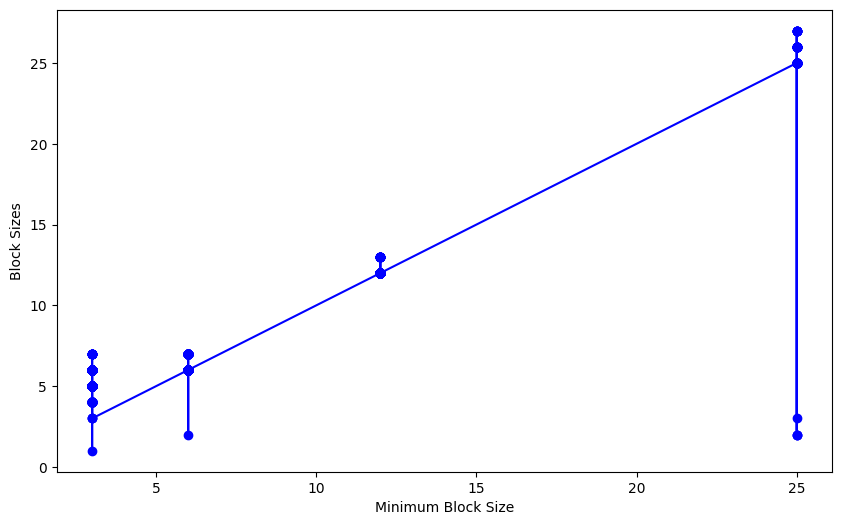

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(min_block_sizes, block_sizes, marker='o', linestyle='-', color='b')
ax.set_xlabel("Minimum Block Size")
ax.set_ylabel("Block Sizes")

fig.show()


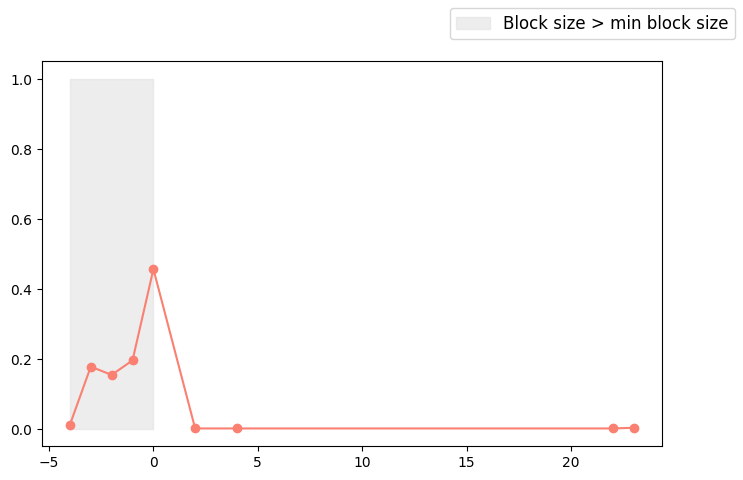

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))

values, counts  = np.unique(min_block_sizes - block_sizes, return_counts=True)

ax.plot(values, counts/counts.sum(), marker='o', linestyle='-', color='salmon')

ax.fill_betweenx(y=[0, 1], x1=min(values), x2=0, color='#dddddd', alpha=0.5, label='Block size > min block size')

fig.legend(fontsize=12)




In [1]:
import numpy as np

In [2]:
def fun(B, delta=0.05, Delta=10**3):
    return np.log((B+B**2)/delta)*Delta

In [ ]:
fun(1000//3)

np.float64(14615.015756511137)